In [4]:
pip install cdlib

  Using cached cdlib-0.2.6-py3-none-any.whl (228 kB)
  Using cached nf1-0.0.4-py3-none-any.whl (18 kB)
  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)
  Using cached thresholdclustering-1.1-py3-none-any.whl (5.3 kB)
  Using cached angel_cd-1.0.3-py3-none-any.whl (10 kB)
  Using cached PuLP-2.6.0-py3-none-any.whl (14.2 MB)
  Using cached python-Levenshtein-0.12.2.tar.gz (50 kB)
  Preparing metadata (setup.py) ... done
  Using cached dynetx-0.3.1-py3-none-any.whl (39 kB)
  Preparing metadata (setup.py) ... done
  Using cached pyclustering-0.10.1.2.tar.gz (2.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached eva_lcd-0.1.1-py3-none-any.whl (9.2 kB)
  Using cached demon-2.0.6-py3-none-any.whl (7.3 kB)
  Using cached python-louvain-0.16.tar.gz (204 kB)
  Preparing metadata (setup.py) ... done
  Using cached bimlpa-0.1.2-py3-none-any.whl (7.0 kB)
  Using cached chinese_whispers-0.8.0-py3-none-any.whl (7.7 kB)
  Using cached markov_clustering-0.0.6.dev0-py3-none-any.whl (6.3 kB)

In [6]:
pip install powerlaw

  Using cached powerlaw-1.5-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns
import json

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'karateclub', 'infomap'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'leidenalg', 'infomap'}


In [2]:
from cdlib import algorithms

In [3]:
path_subgraph = "/Users/damon/Desktop/Dessertion/2-Network Analysis/"

In [4]:
def plot_centralities(first, name_f, second, name_s, third, name_t, n):

    lista = [(k, v) for k, v in first.items()]
    lista.sort(key=lambda x: x[1], reverse = True)
    tops = lista[:n]
    first_ = []
    second_ = []
    third_ = []
    for i in tops:
        first_.append(first[i[0]])
        second_.append(second[i[0]])
        third_.append(third[i[0]])
        
    tops = [i for i,j in tops]
    tops = tops[::-1]
    first_ = first_[::-1]
    second_ = second_[::-1]
    third_ = third_[::-1]
    
    fig = plt.figure(figsize = (25,8), dpi = 300)

    fontsize = 17
    plt.rcParams.update({'font.size': fontsize})
    ax = fig.add_subplot(151)
    plt.barh(tops,first_, color = "#31A894")
    plt.grid(axis = 'both', alpha = .3)
    plt.xlabel(name_f)

    ax2 = fig.add_subplot(152)
    plt.barh(tops,second_, color = "#315FA8")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax2.get_yticklabels(), visible = False)
    plt.xlabel(name_s)

    ax3 = fig.add_subplot(153)
    plt.barh(tops,third_, color = "#5D2FA5")
    plt.grid(axis = 'both', alpha = .3)
    plt.setp(ax3.get_yticklabels(), visible = False)
    plt.xlabel(name_t)
    plt.show()

In [5]:
path_graph = "/Users/damon/Desktop/Dessertion/2-Network Analysis/"

In [6]:
community_path = "/Users/damon/Desktop/Dessertion/3-Community Discovery/"

In [7]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [8]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

In [9]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [10]:
with open(community_path+'louvain.pickle', 'rb') as f:
    louvain_coms = pickle.load(f)

In [11]:
sub_graphs = []
for i in louvain_coms.communities:
    sub_graphs.append(G.subgraph(i))

In [12]:
def network_analysis(G):
    print(nx.info(G))
    N = G.number_of_nodes()
    print("LMAX: ", (N * (N-1))/2.0)
    print("AVG_Degree:", (2*G.number_of_edges())/N)
    density = nx.density(G)
    print("Density: ", density)
    print("Avg Clustering coefficient:", nx.average_clustering(G))

In [13]:
selected_graphs_idx = [0, 1, 3, 12]

In [14]:
for i in selected_graphs_idx:
    network_analysis(sub_graphs[i])

Graph with 327 nodes and 871 edges
LMAX:  53301.0
AVG_Degree: 5.327217125382263
Density:  0.01634115682632596
Avg Clustering coefficient: 0.7978120527365601
Graph with 289 nodes and 967 edges
LMAX:  41616.0
AVG_Degree: 6.692041522491349
Density:  0.023236255286428295
Avg Clustering coefficient: 0.7924459174968626
Graph with 227 nodes and 648 edges
LMAX:  25651.0
AVG_Degree: 5.709251101321586
Density:  0.025262173014697284
Avg Clustering coefficient: 0.8273176018867469
Graph with 8 nodes and 16 edges
LMAX:  28.0
AVG_Degree: 4.0
Density:  0.5714285714285714
Avg Clustering coefficient: 0.9285714285714286


# 1 - Centrality Community 0

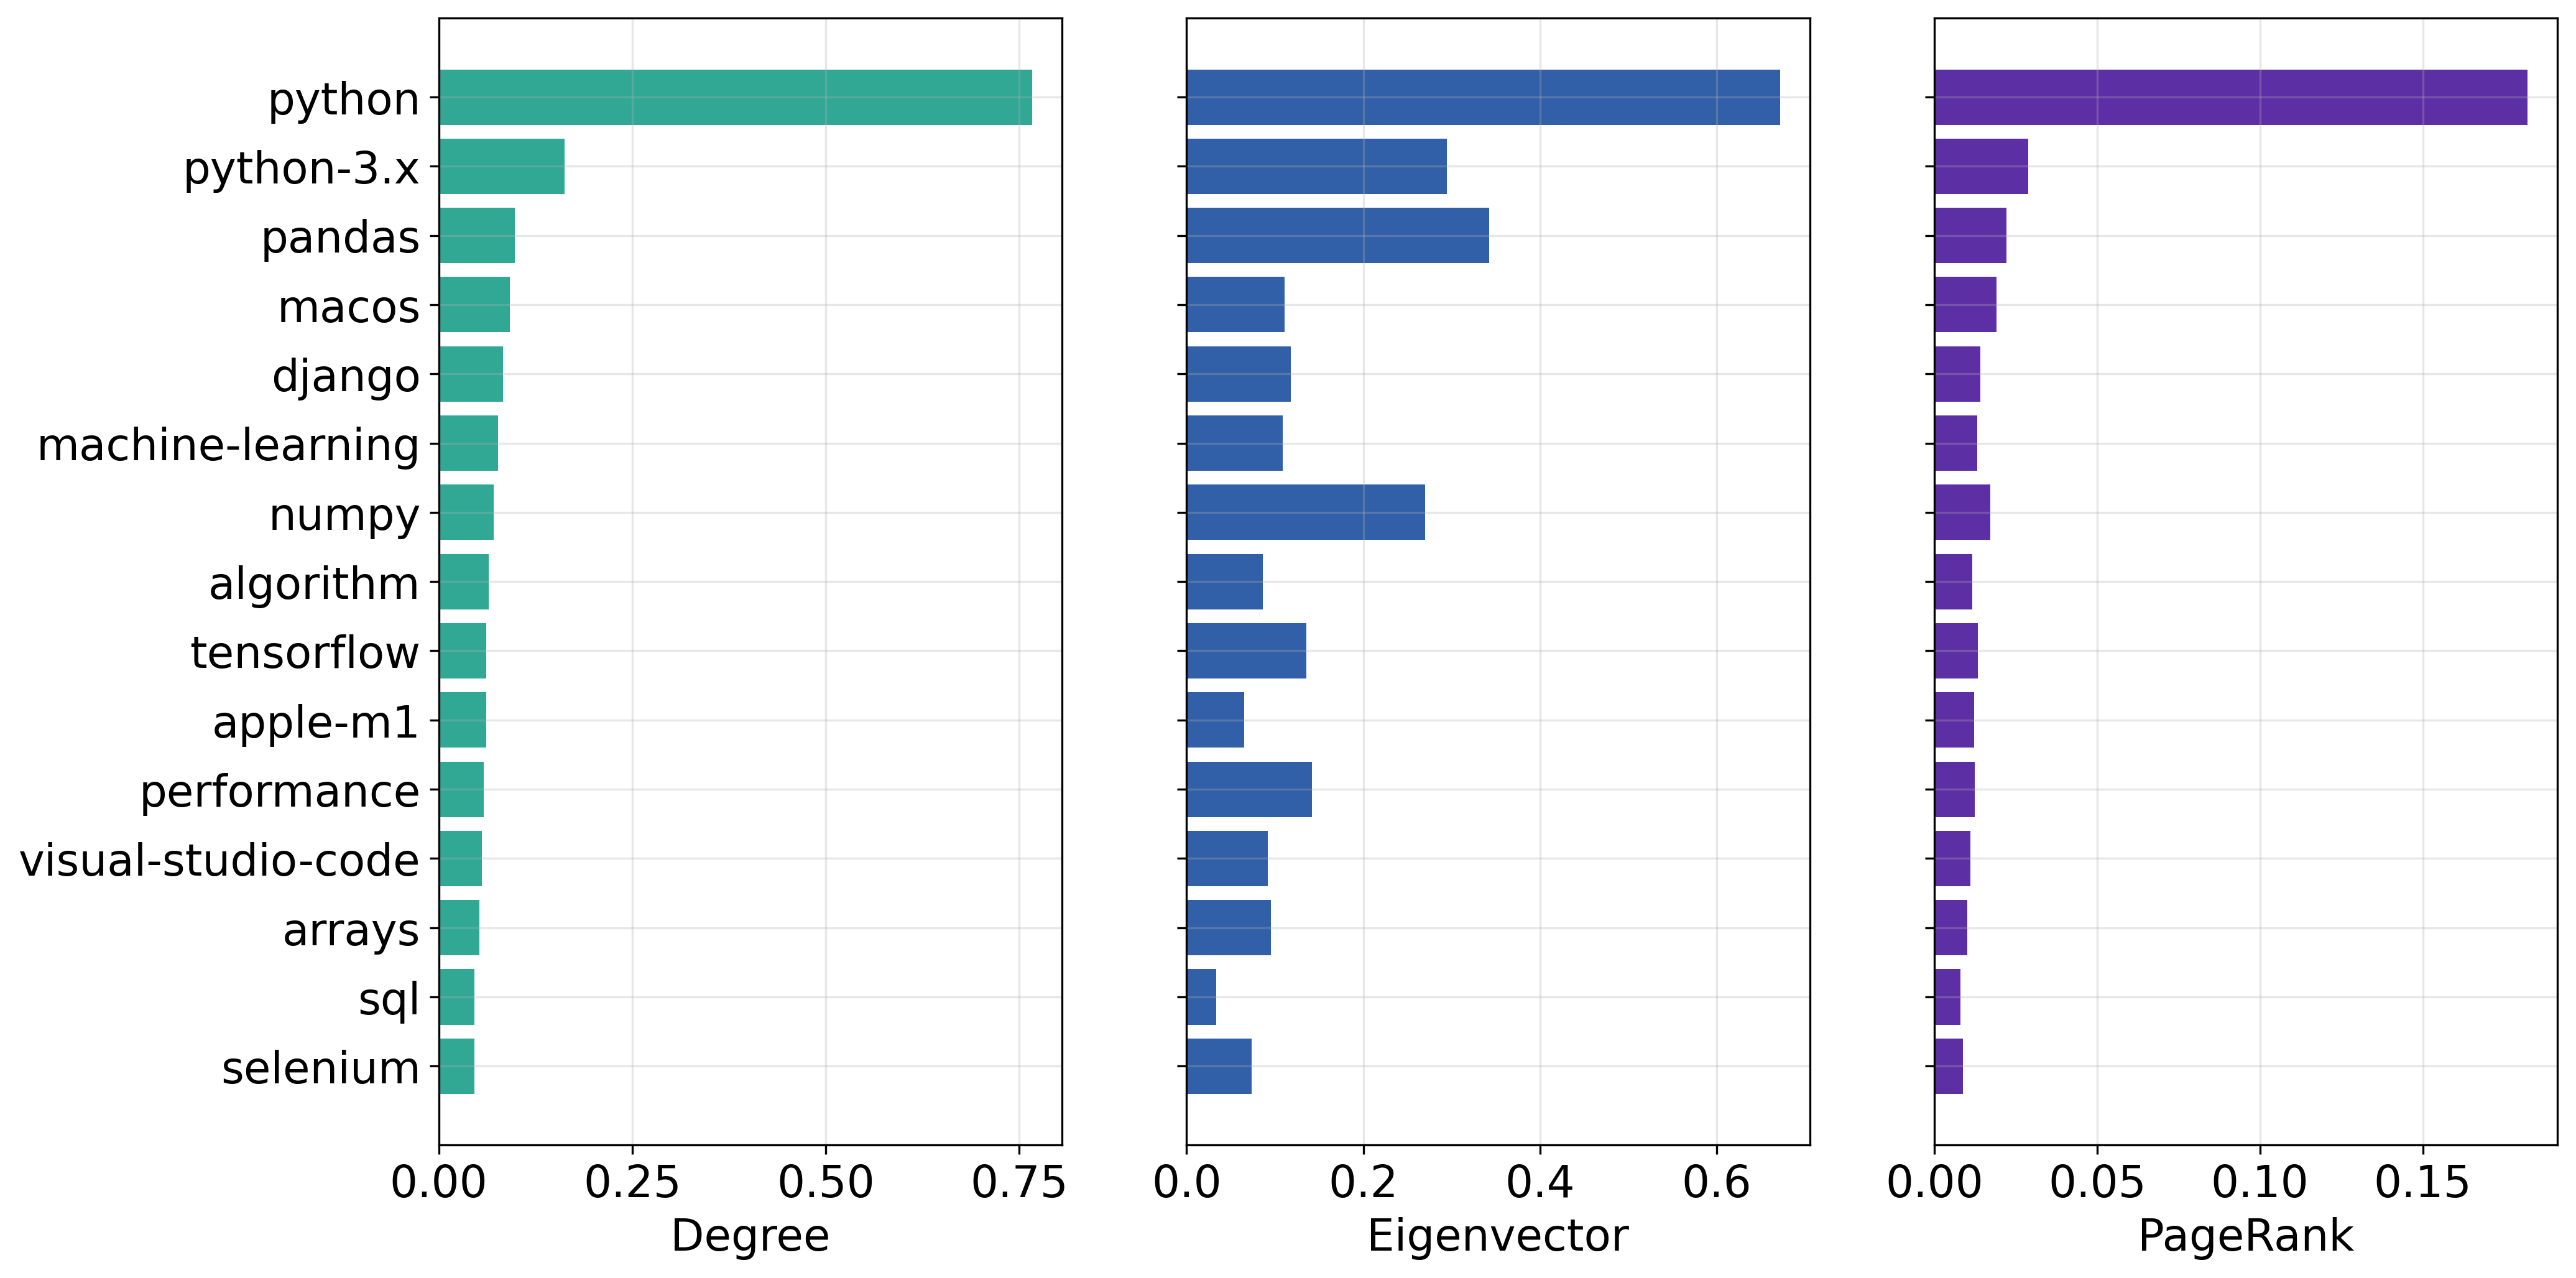

In [15]:
degree_centrality = nx.degree_centrality(sub_graphs[0])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[0], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[0], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

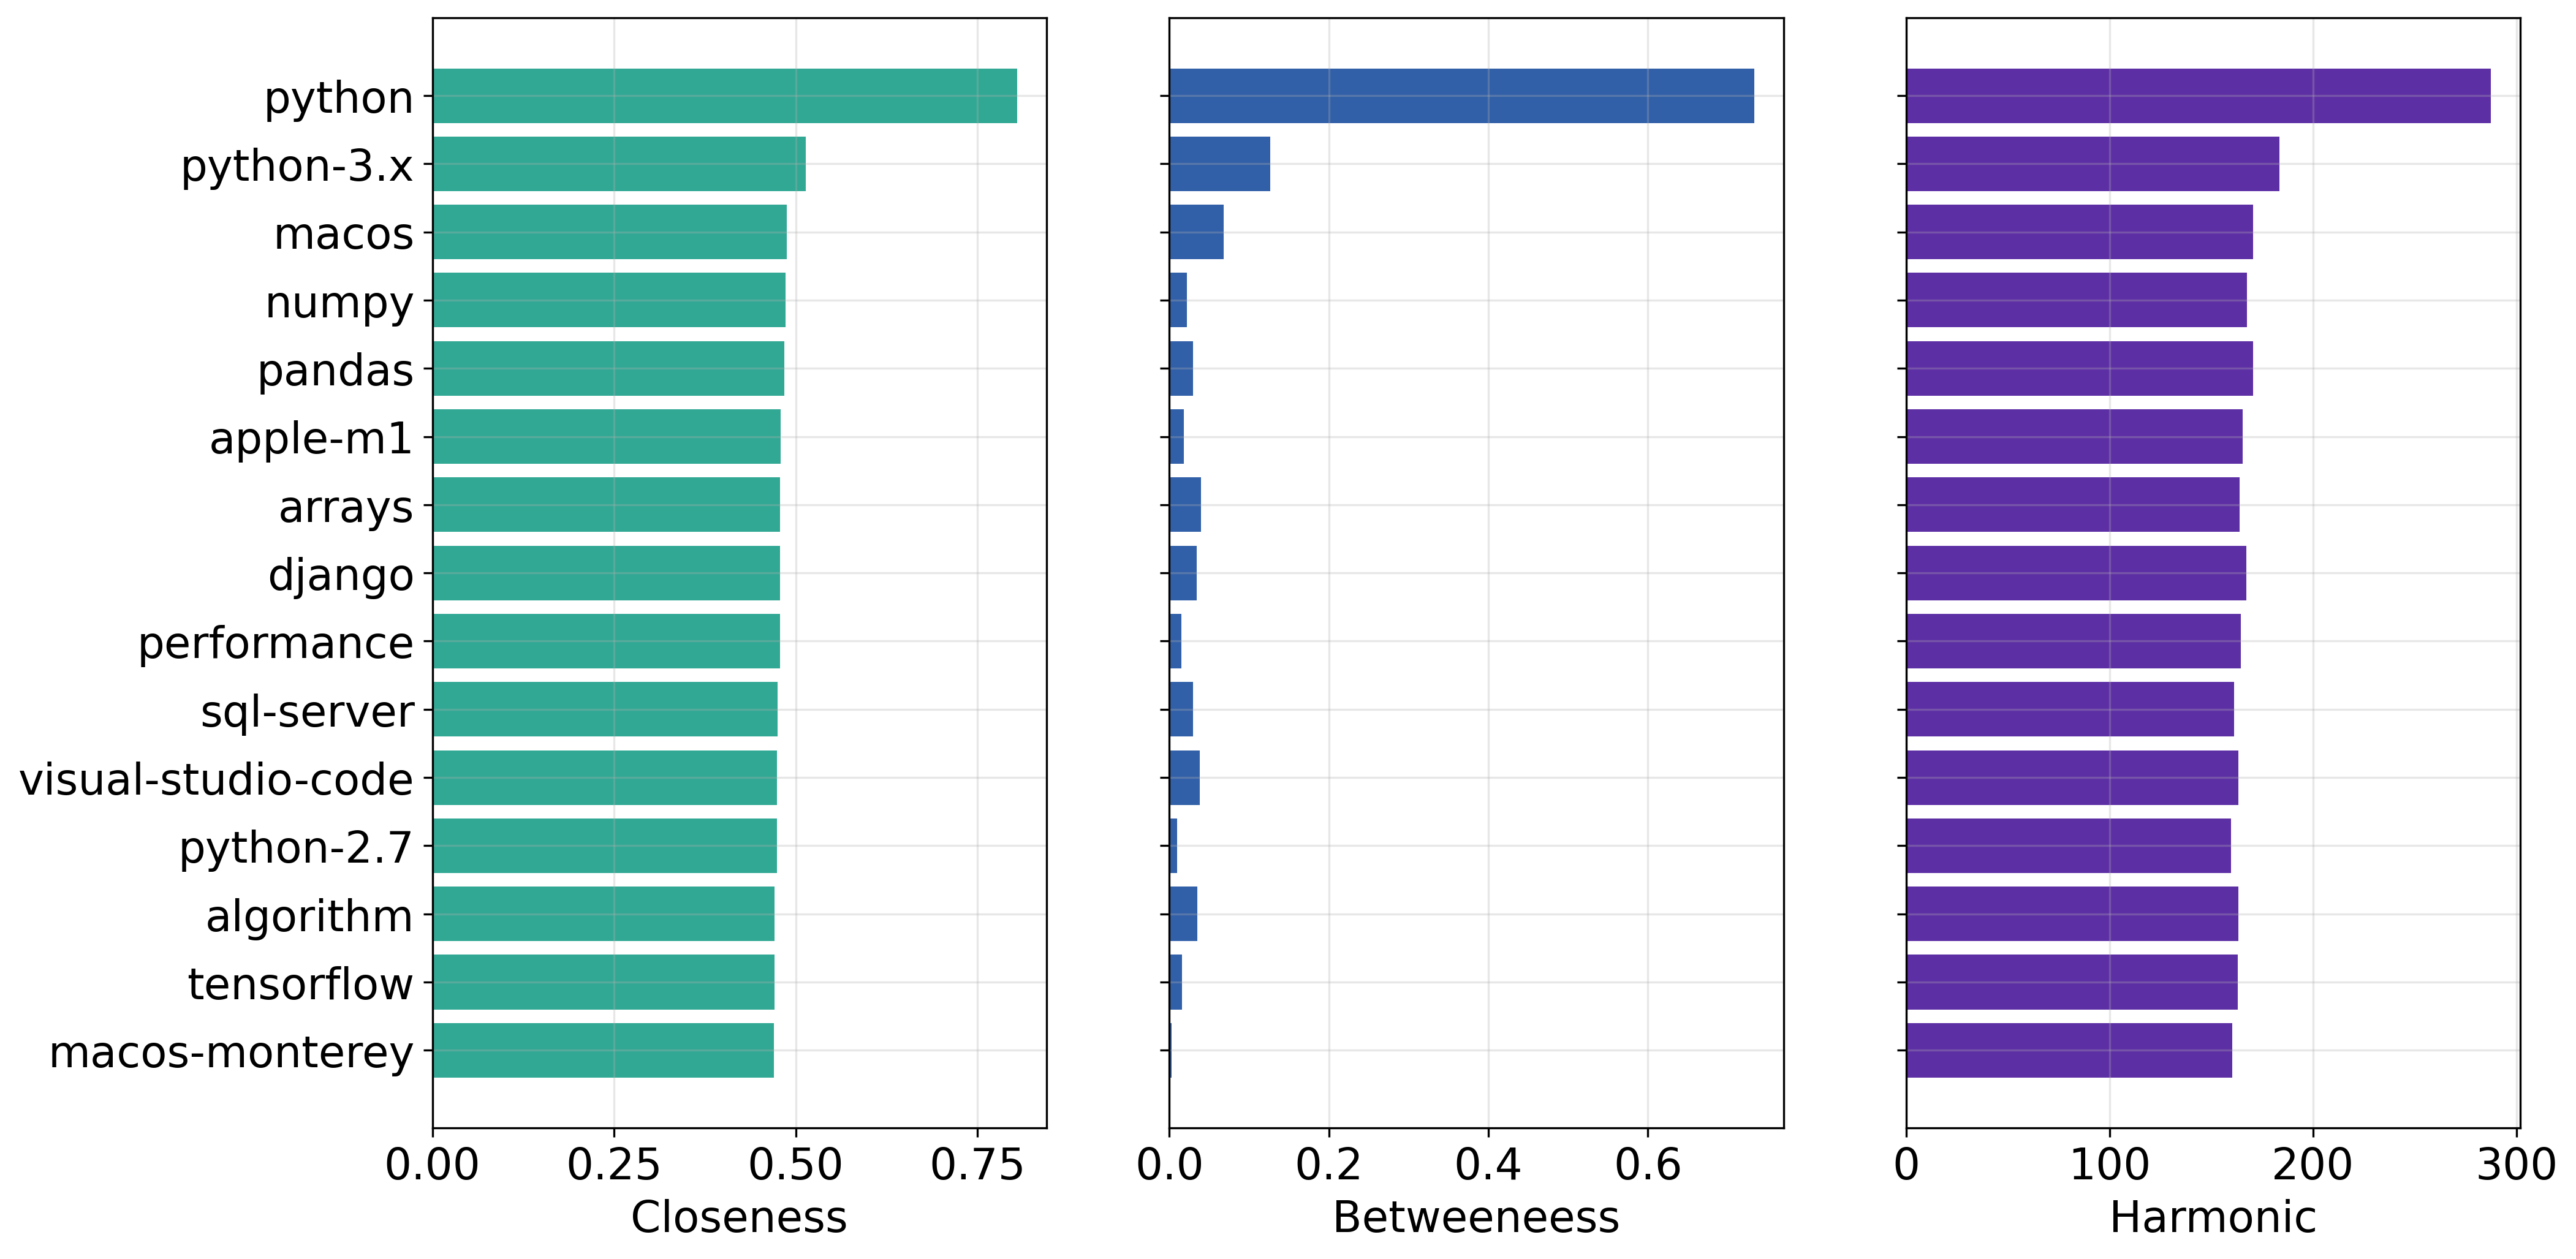

In [16]:
closeness_centrality = nx.closeness_centrality(sub_graphs[0])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[0])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[0], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)

# 2 - Centrality Community 1

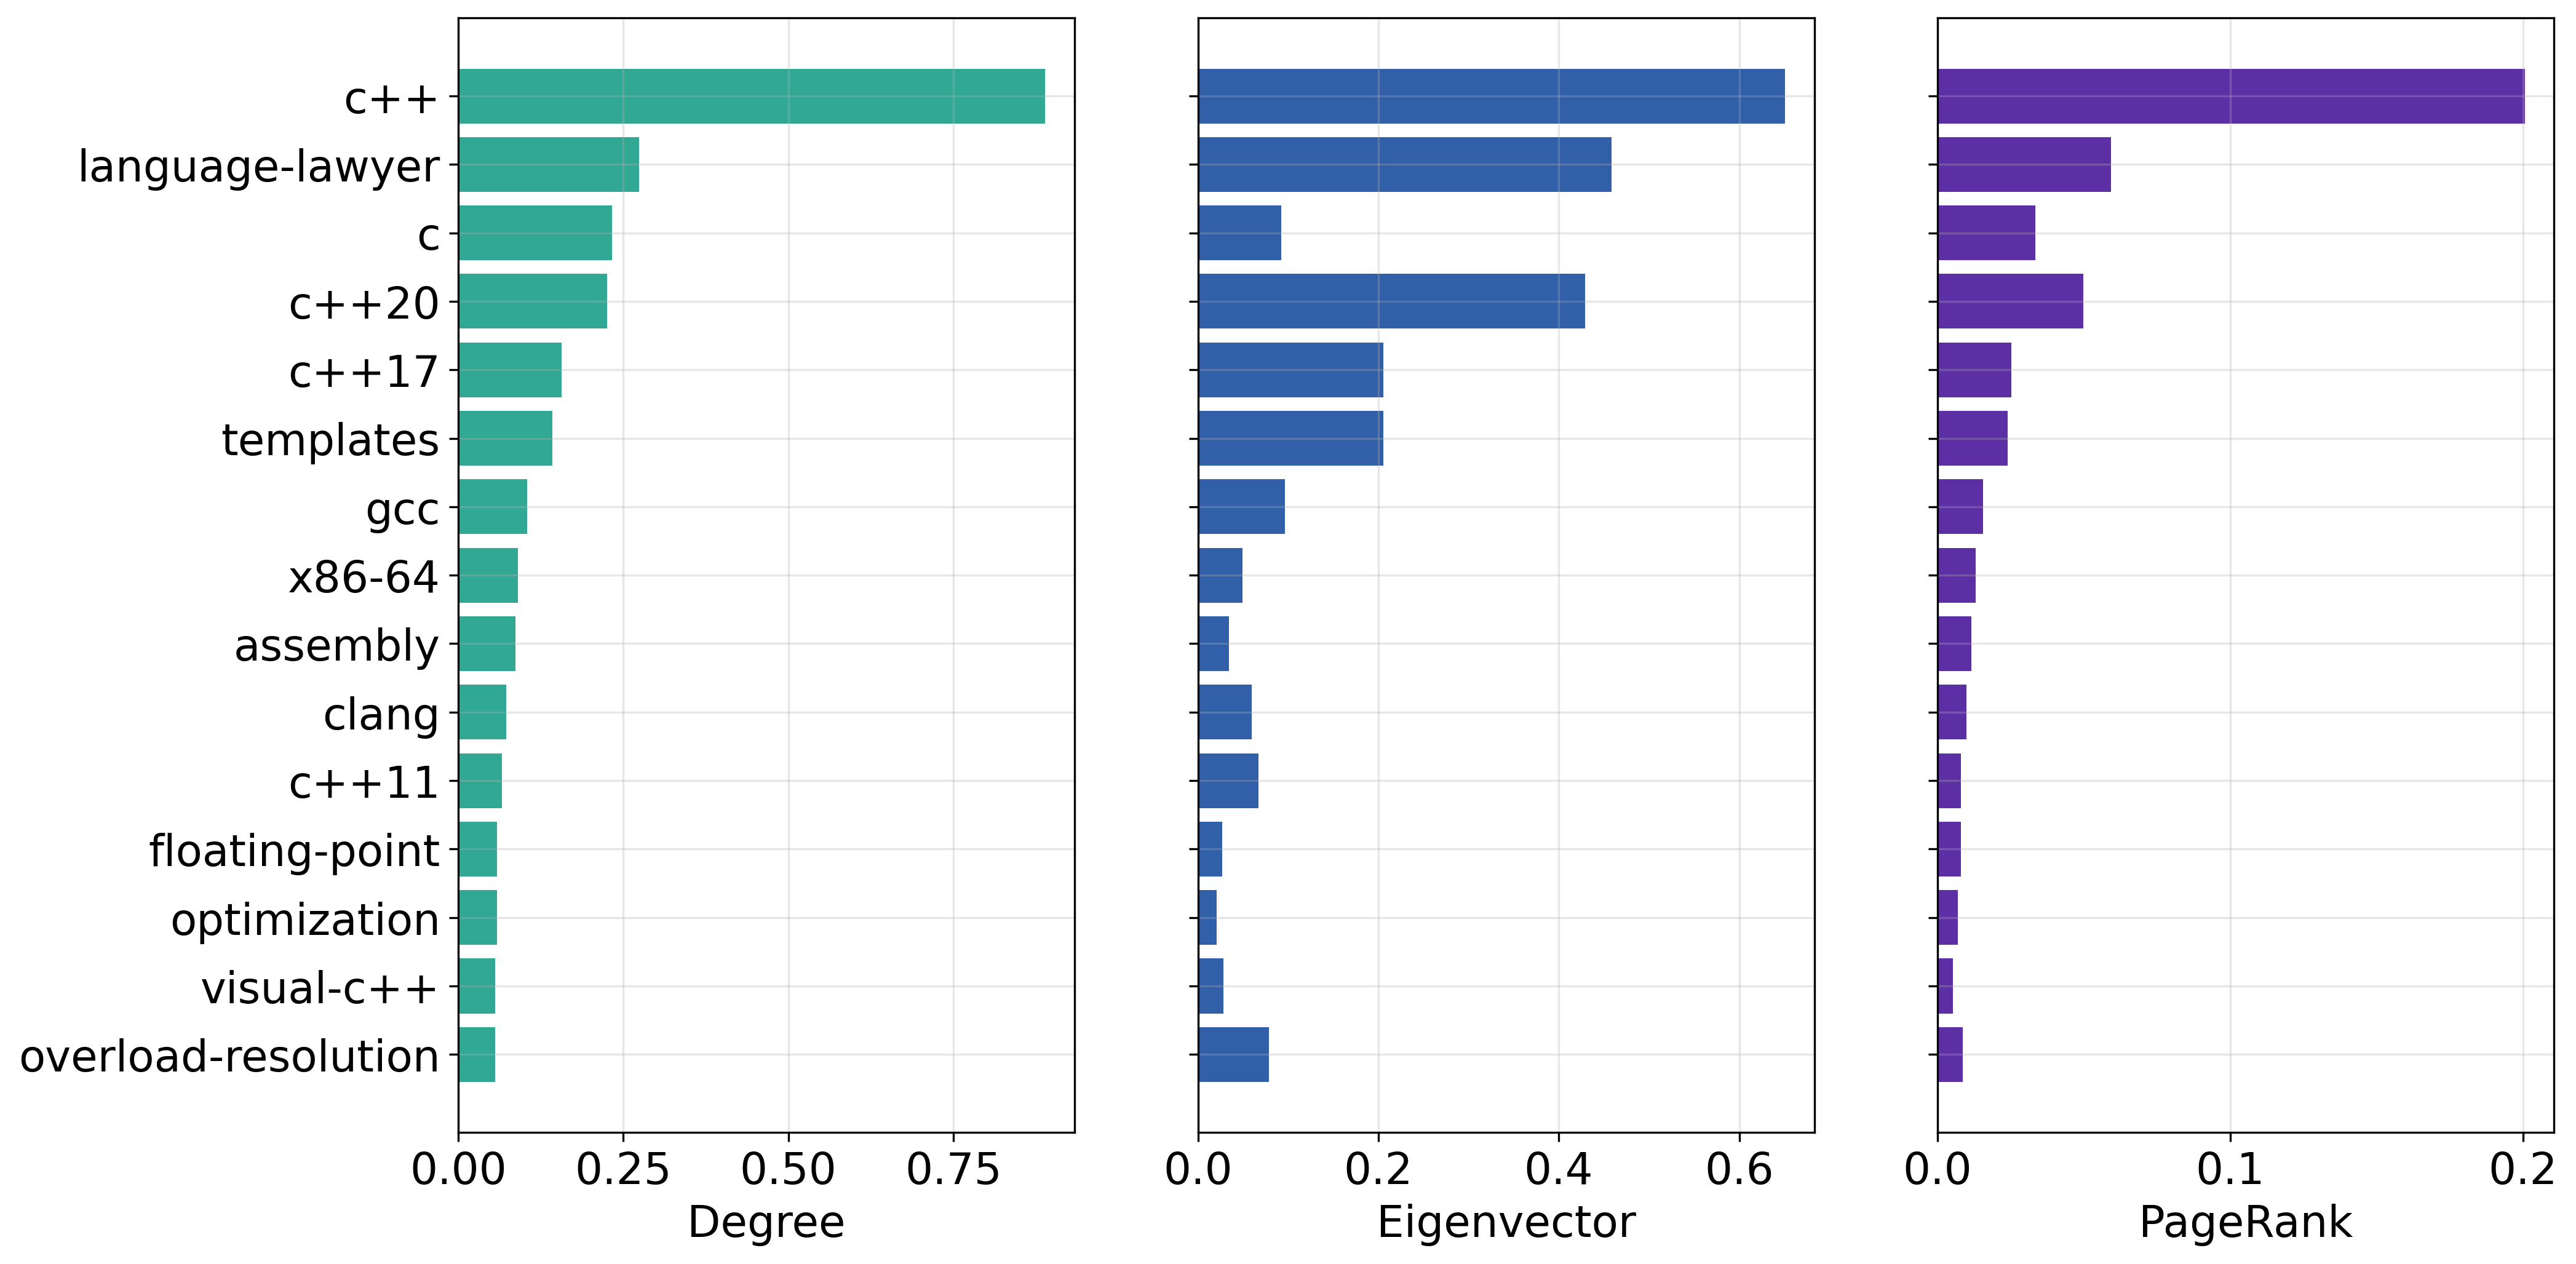

In [17]:
degree_centrality = nx.degree_centrality(sub_graphs[1])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[1], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[1], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

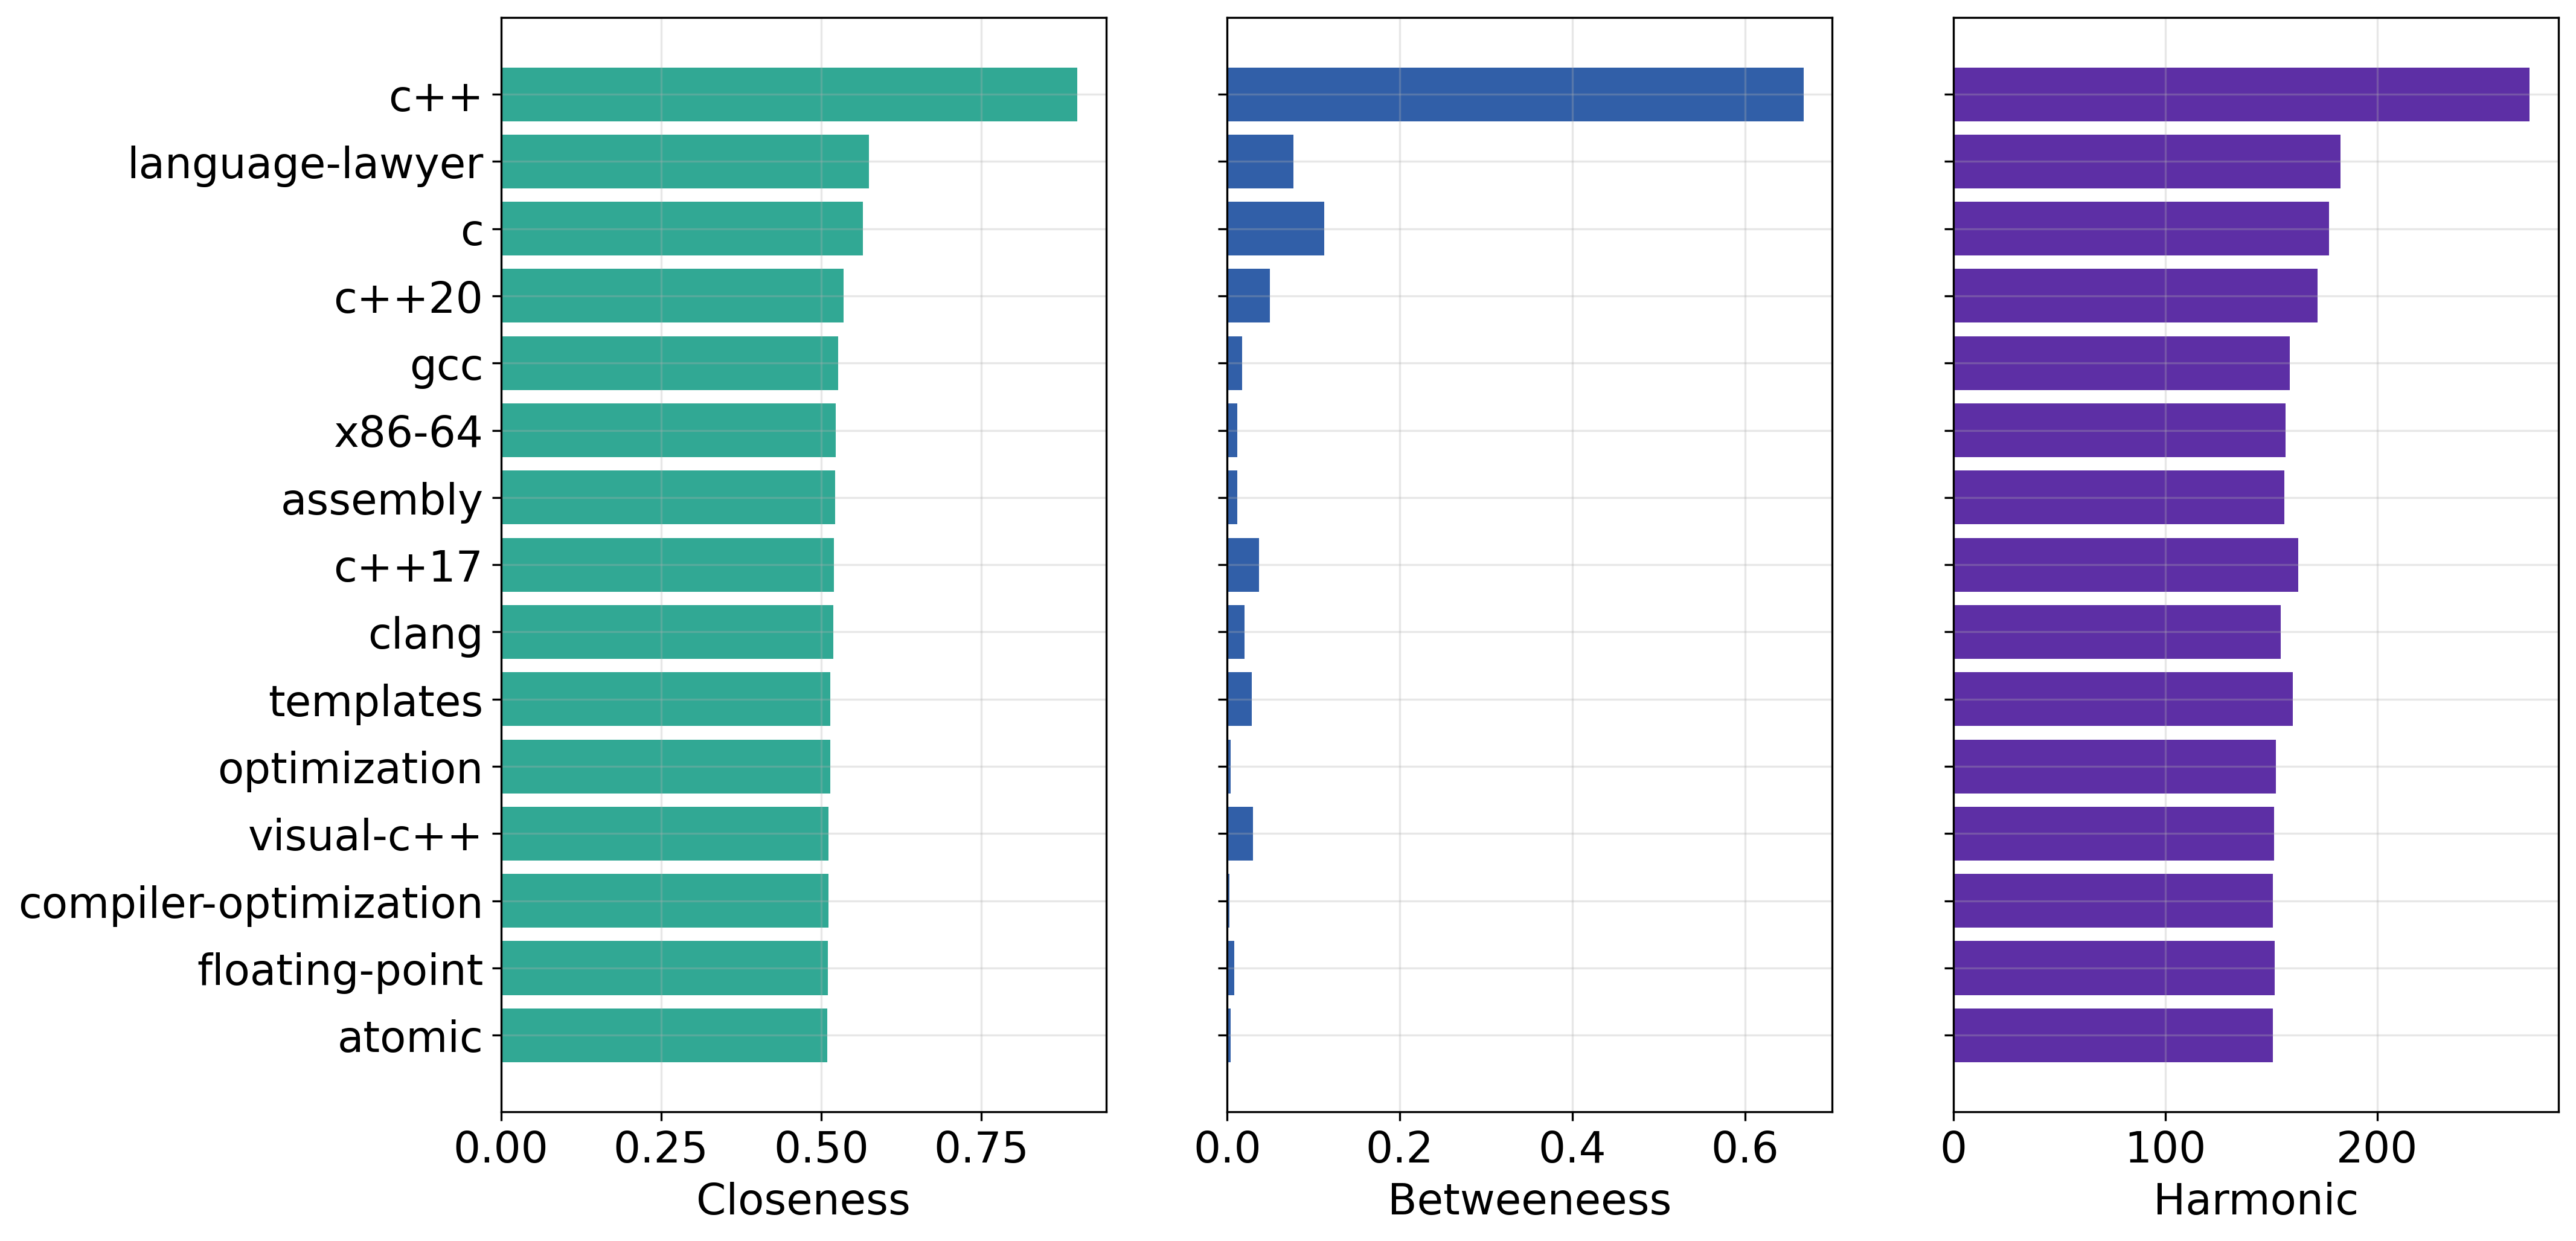

In [18]:
closeness_centrality = nx.closeness_centrality(sub_graphs[1])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[1])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[1], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)

# 3 - Centrality Community 3

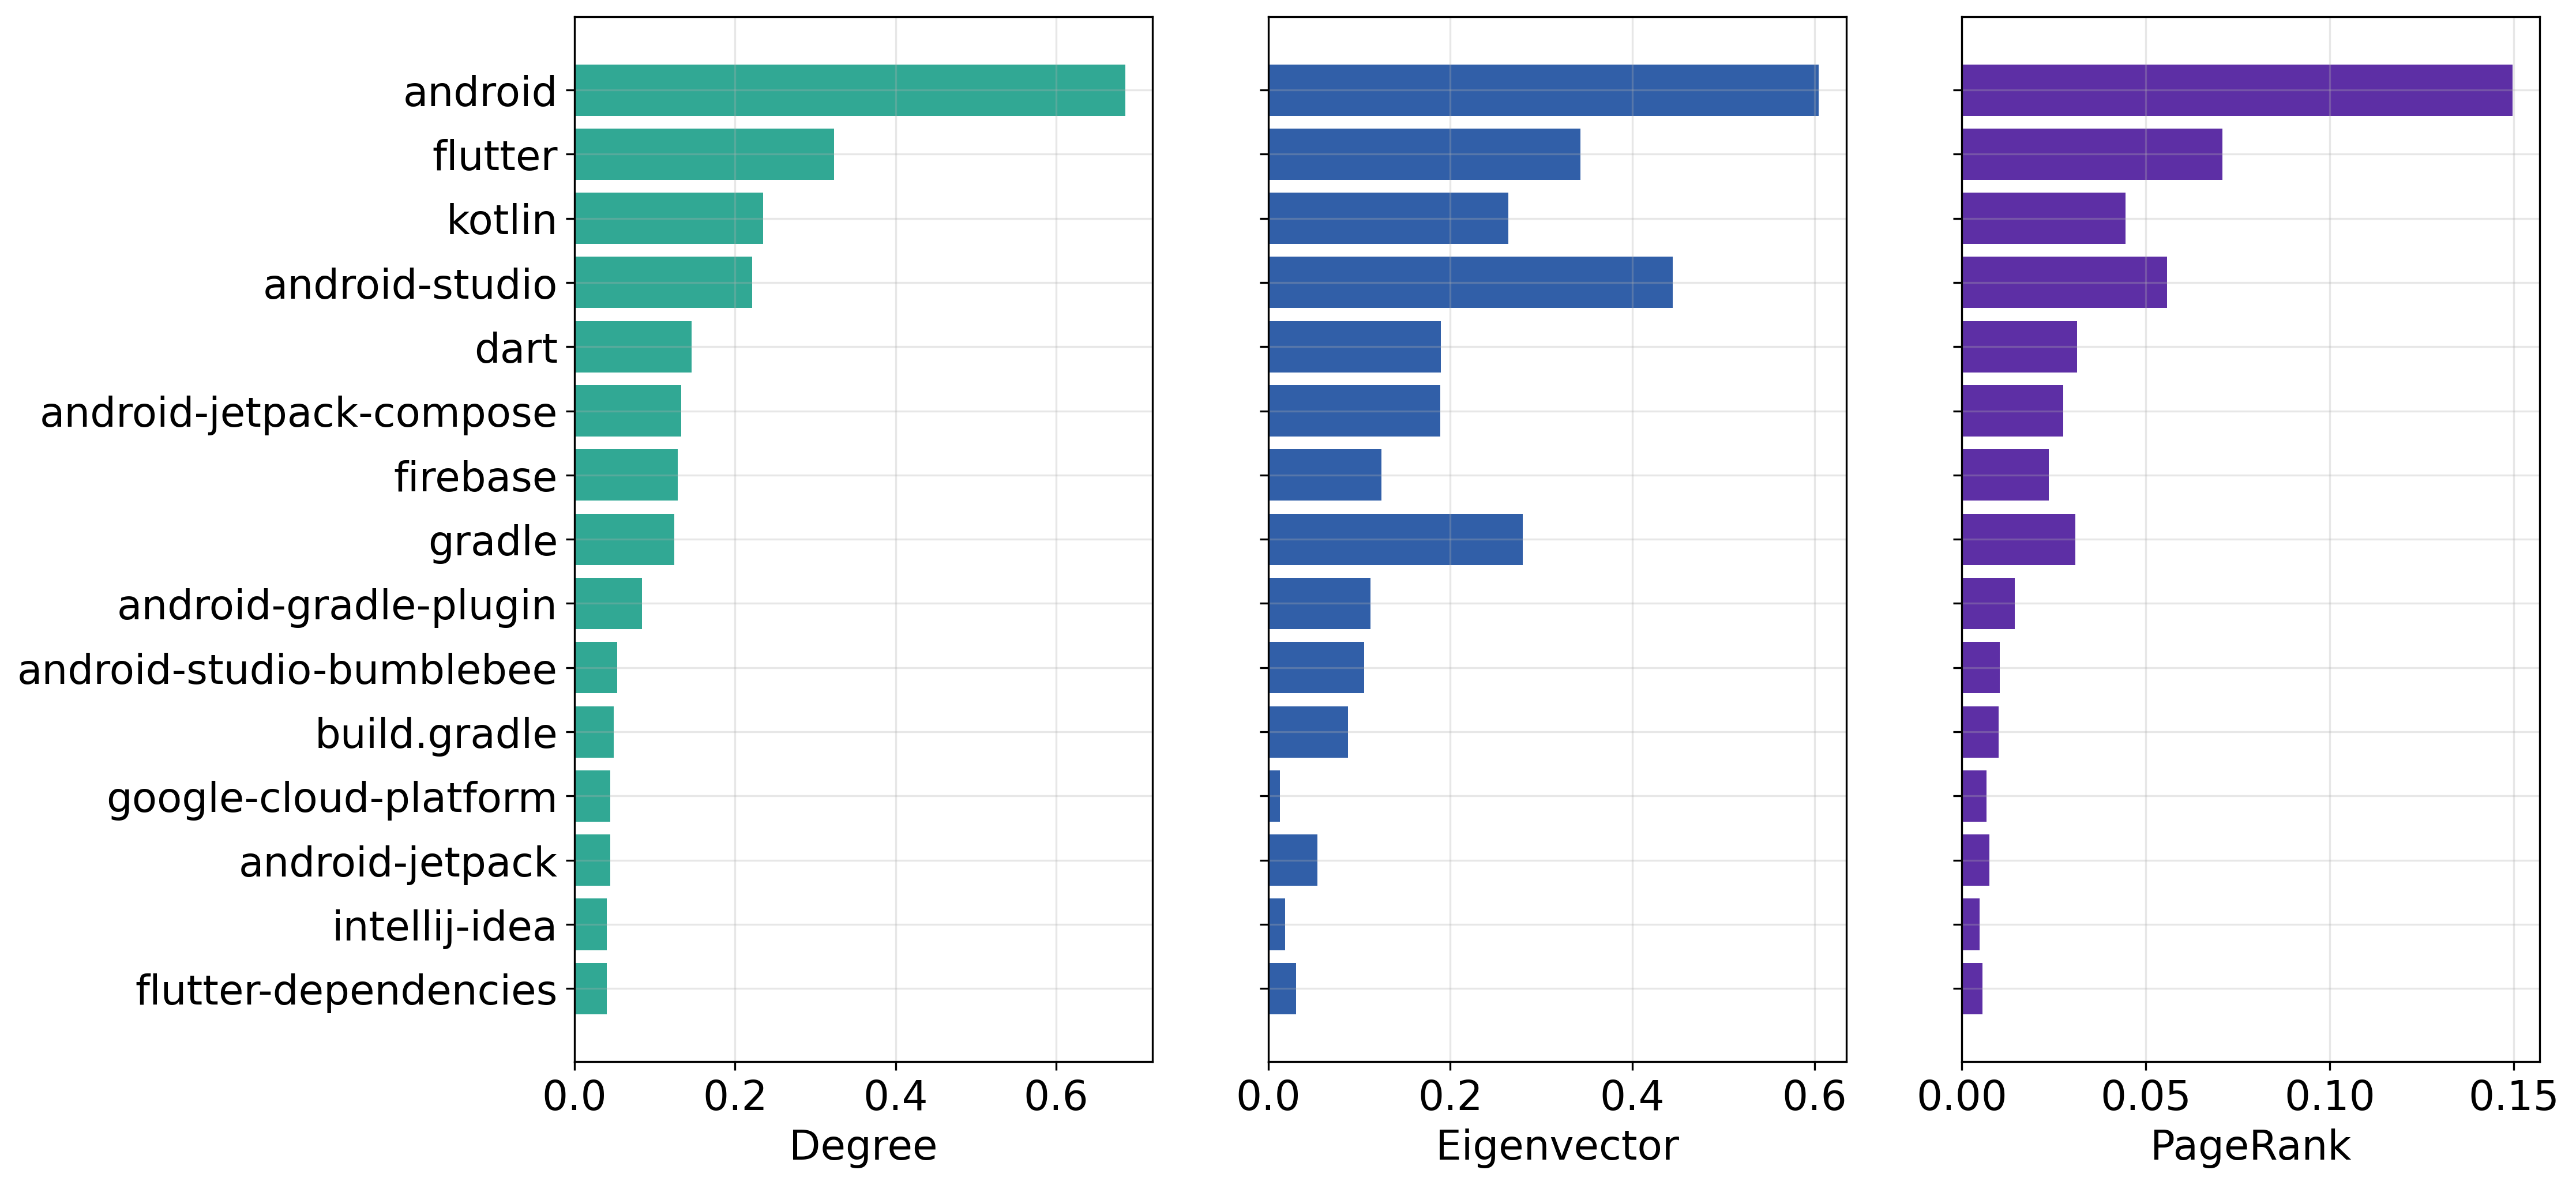

In [19]:
degree_centrality = nx.degree_centrality(sub_graphs[3])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[3], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[3], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

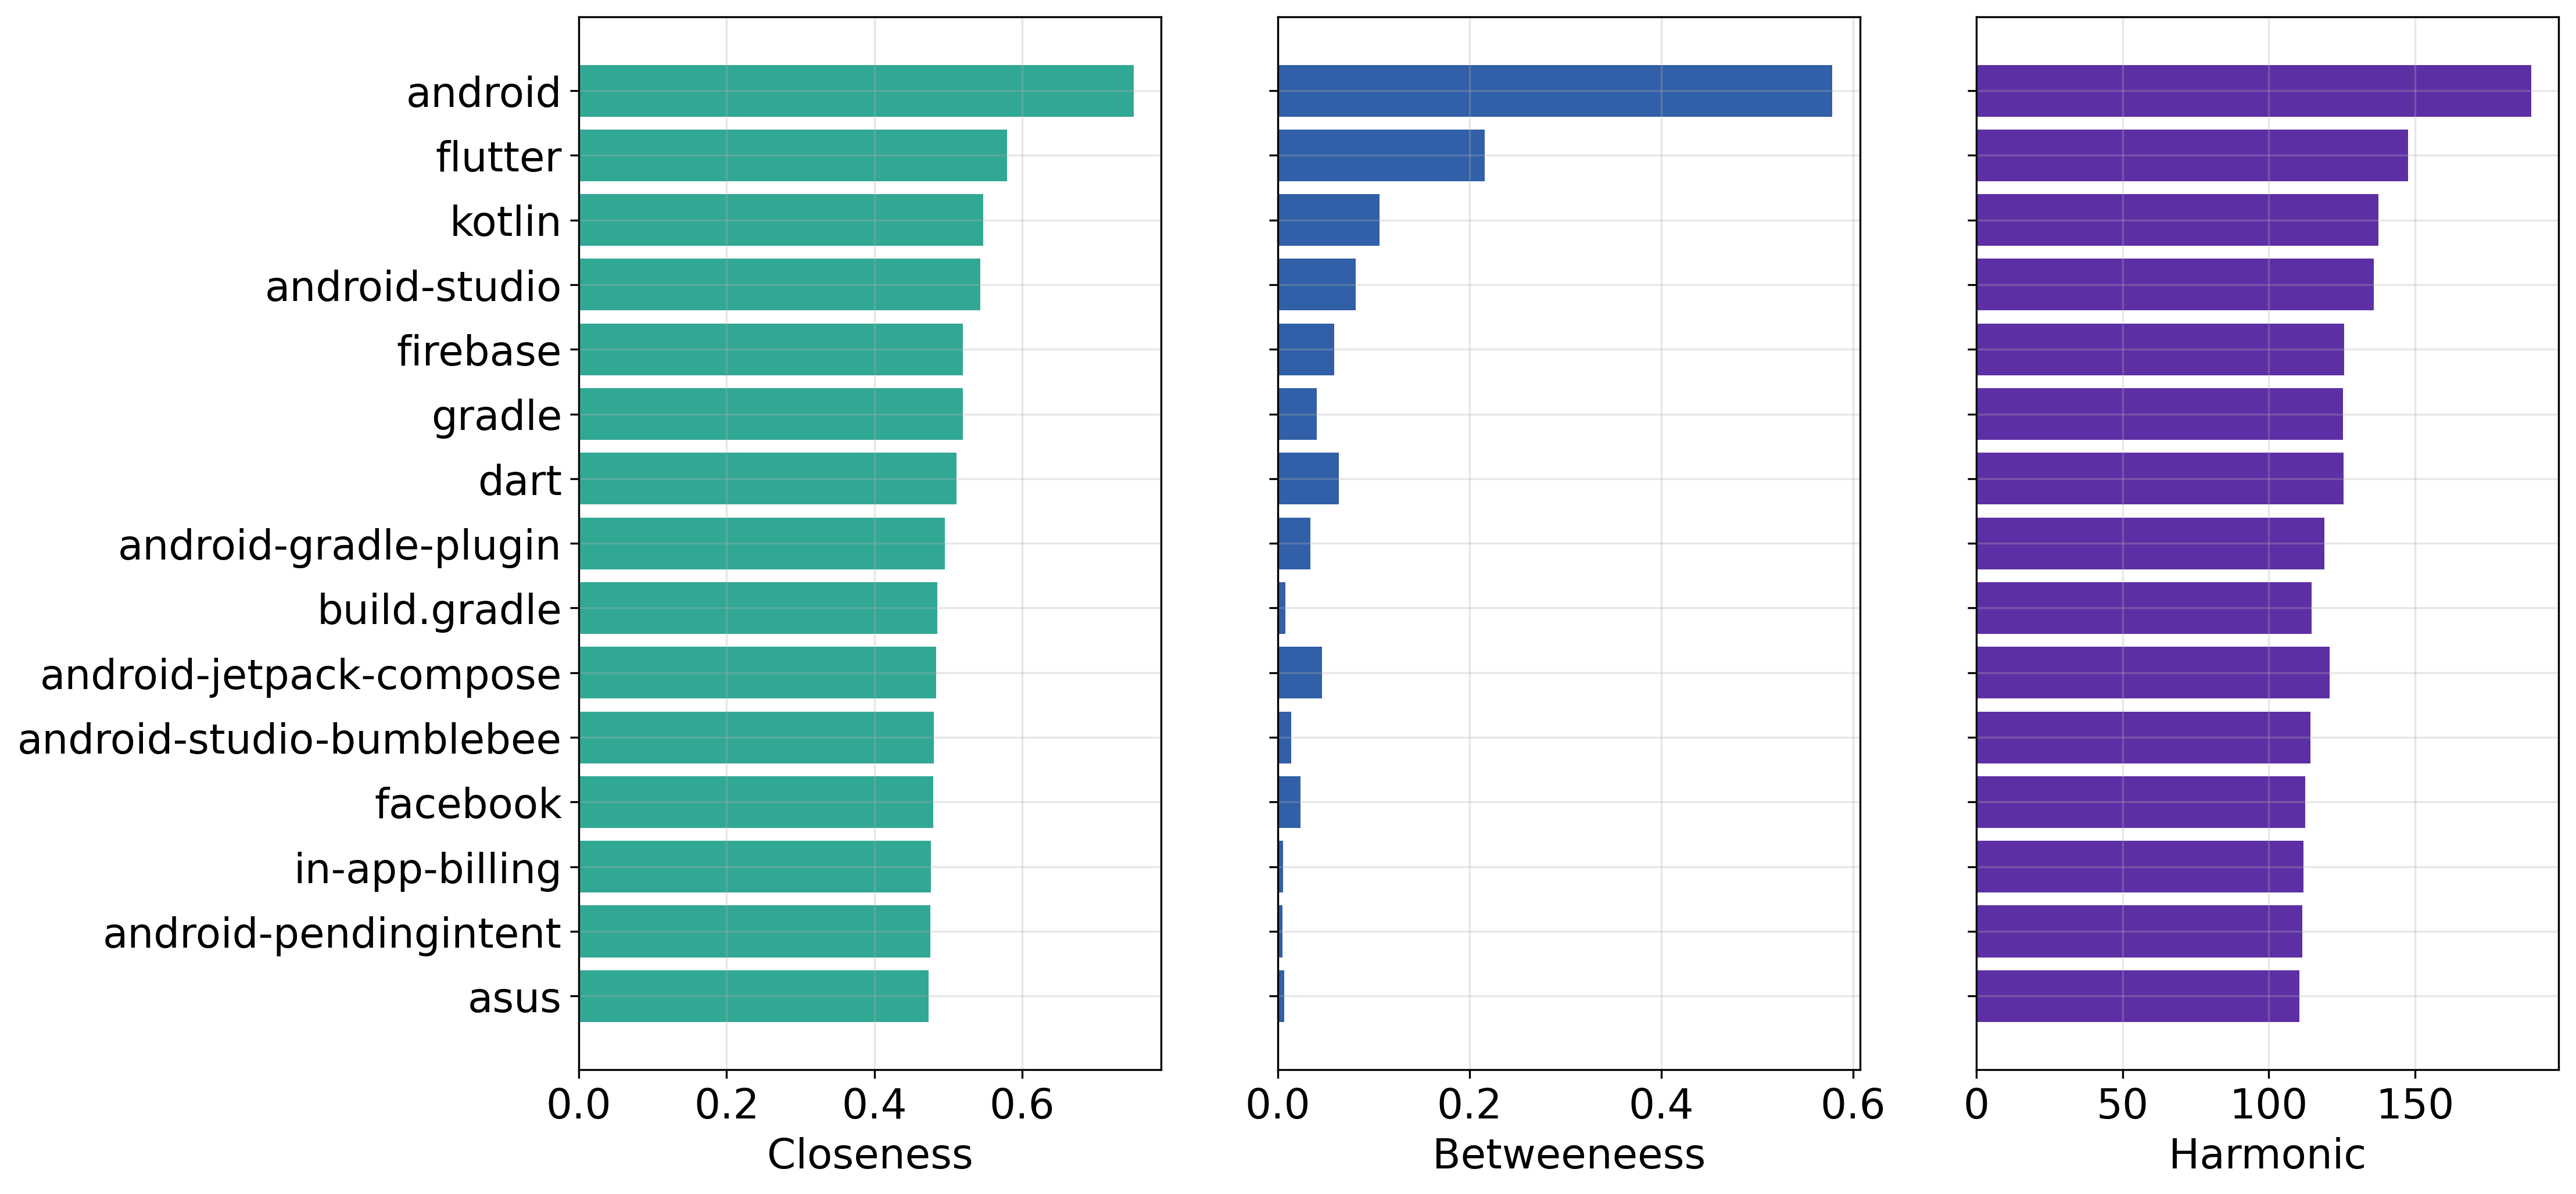

In [20]:
closeness_centrality = nx.closeness_centrality(sub_graphs[3])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[3])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[3], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)

# 4 - Centrality Community 12

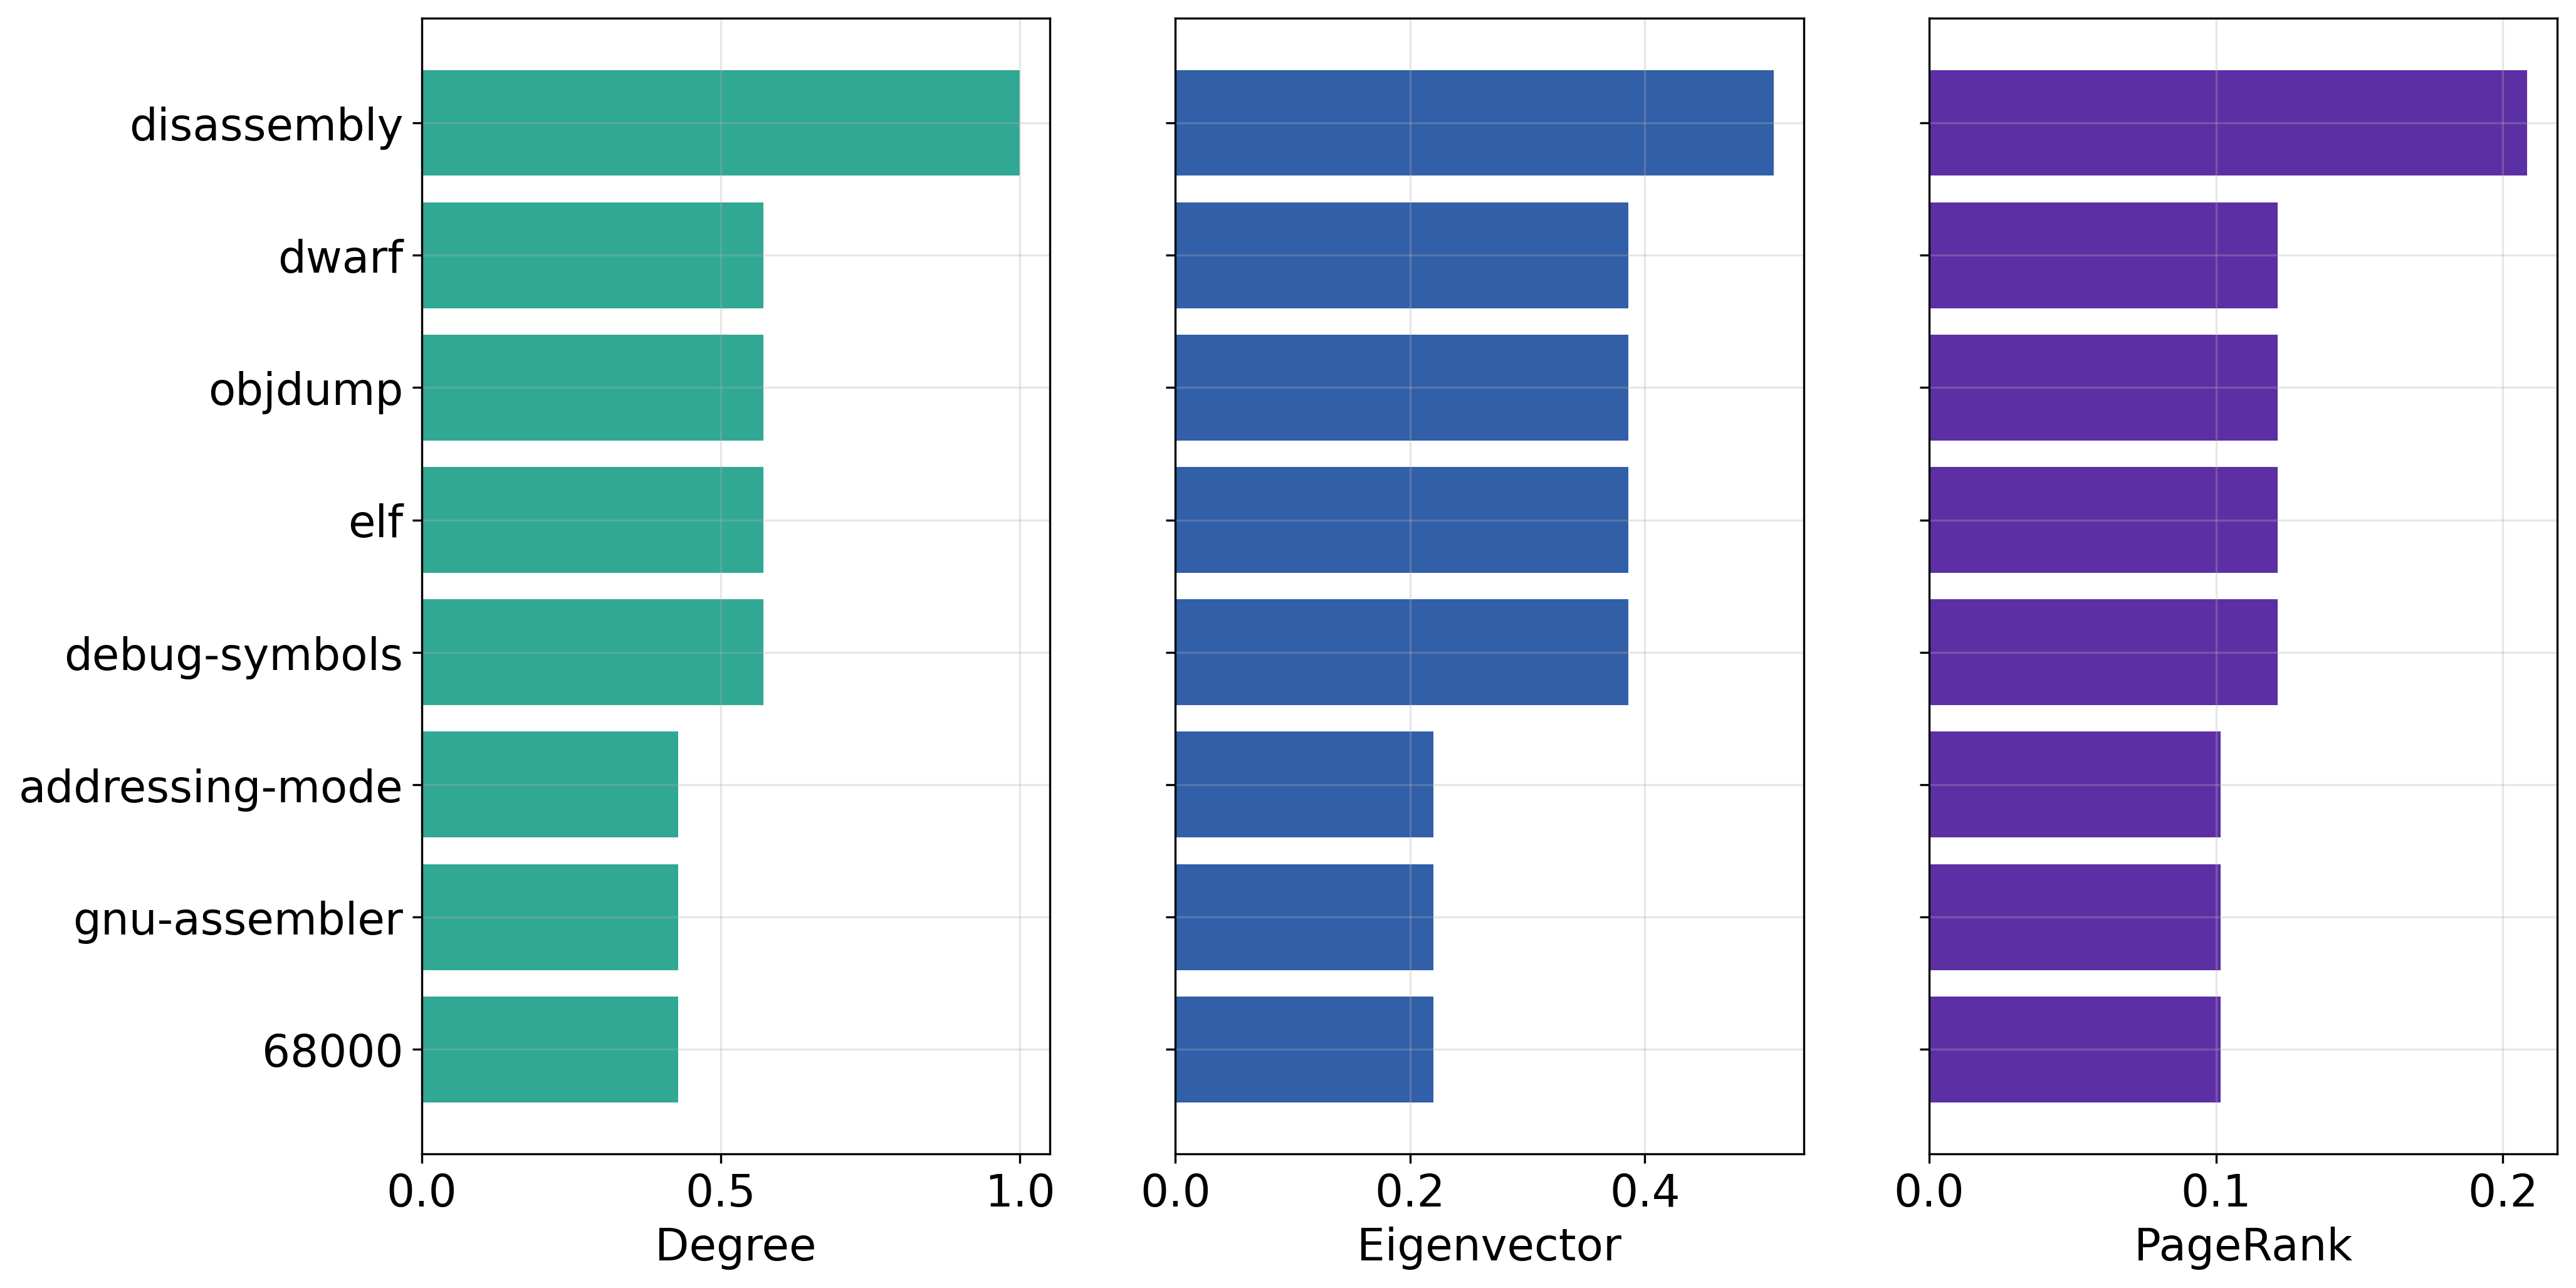

In [21]:
degree_centrality = nx.degree_centrality(sub_graphs[12])
eigenvector_centrality = nx.eigenvector_centrality(sub_graphs[12], weight='Count', max_iter=1000)
pagerank_centrality = nx.pagerank(sub_graphs[12], weight='Count')
plot_centralities(degree_centrality, "Degree", eigenvector_centrality, "Eigenvector", pagerank_centrality, "PageRank", 15)

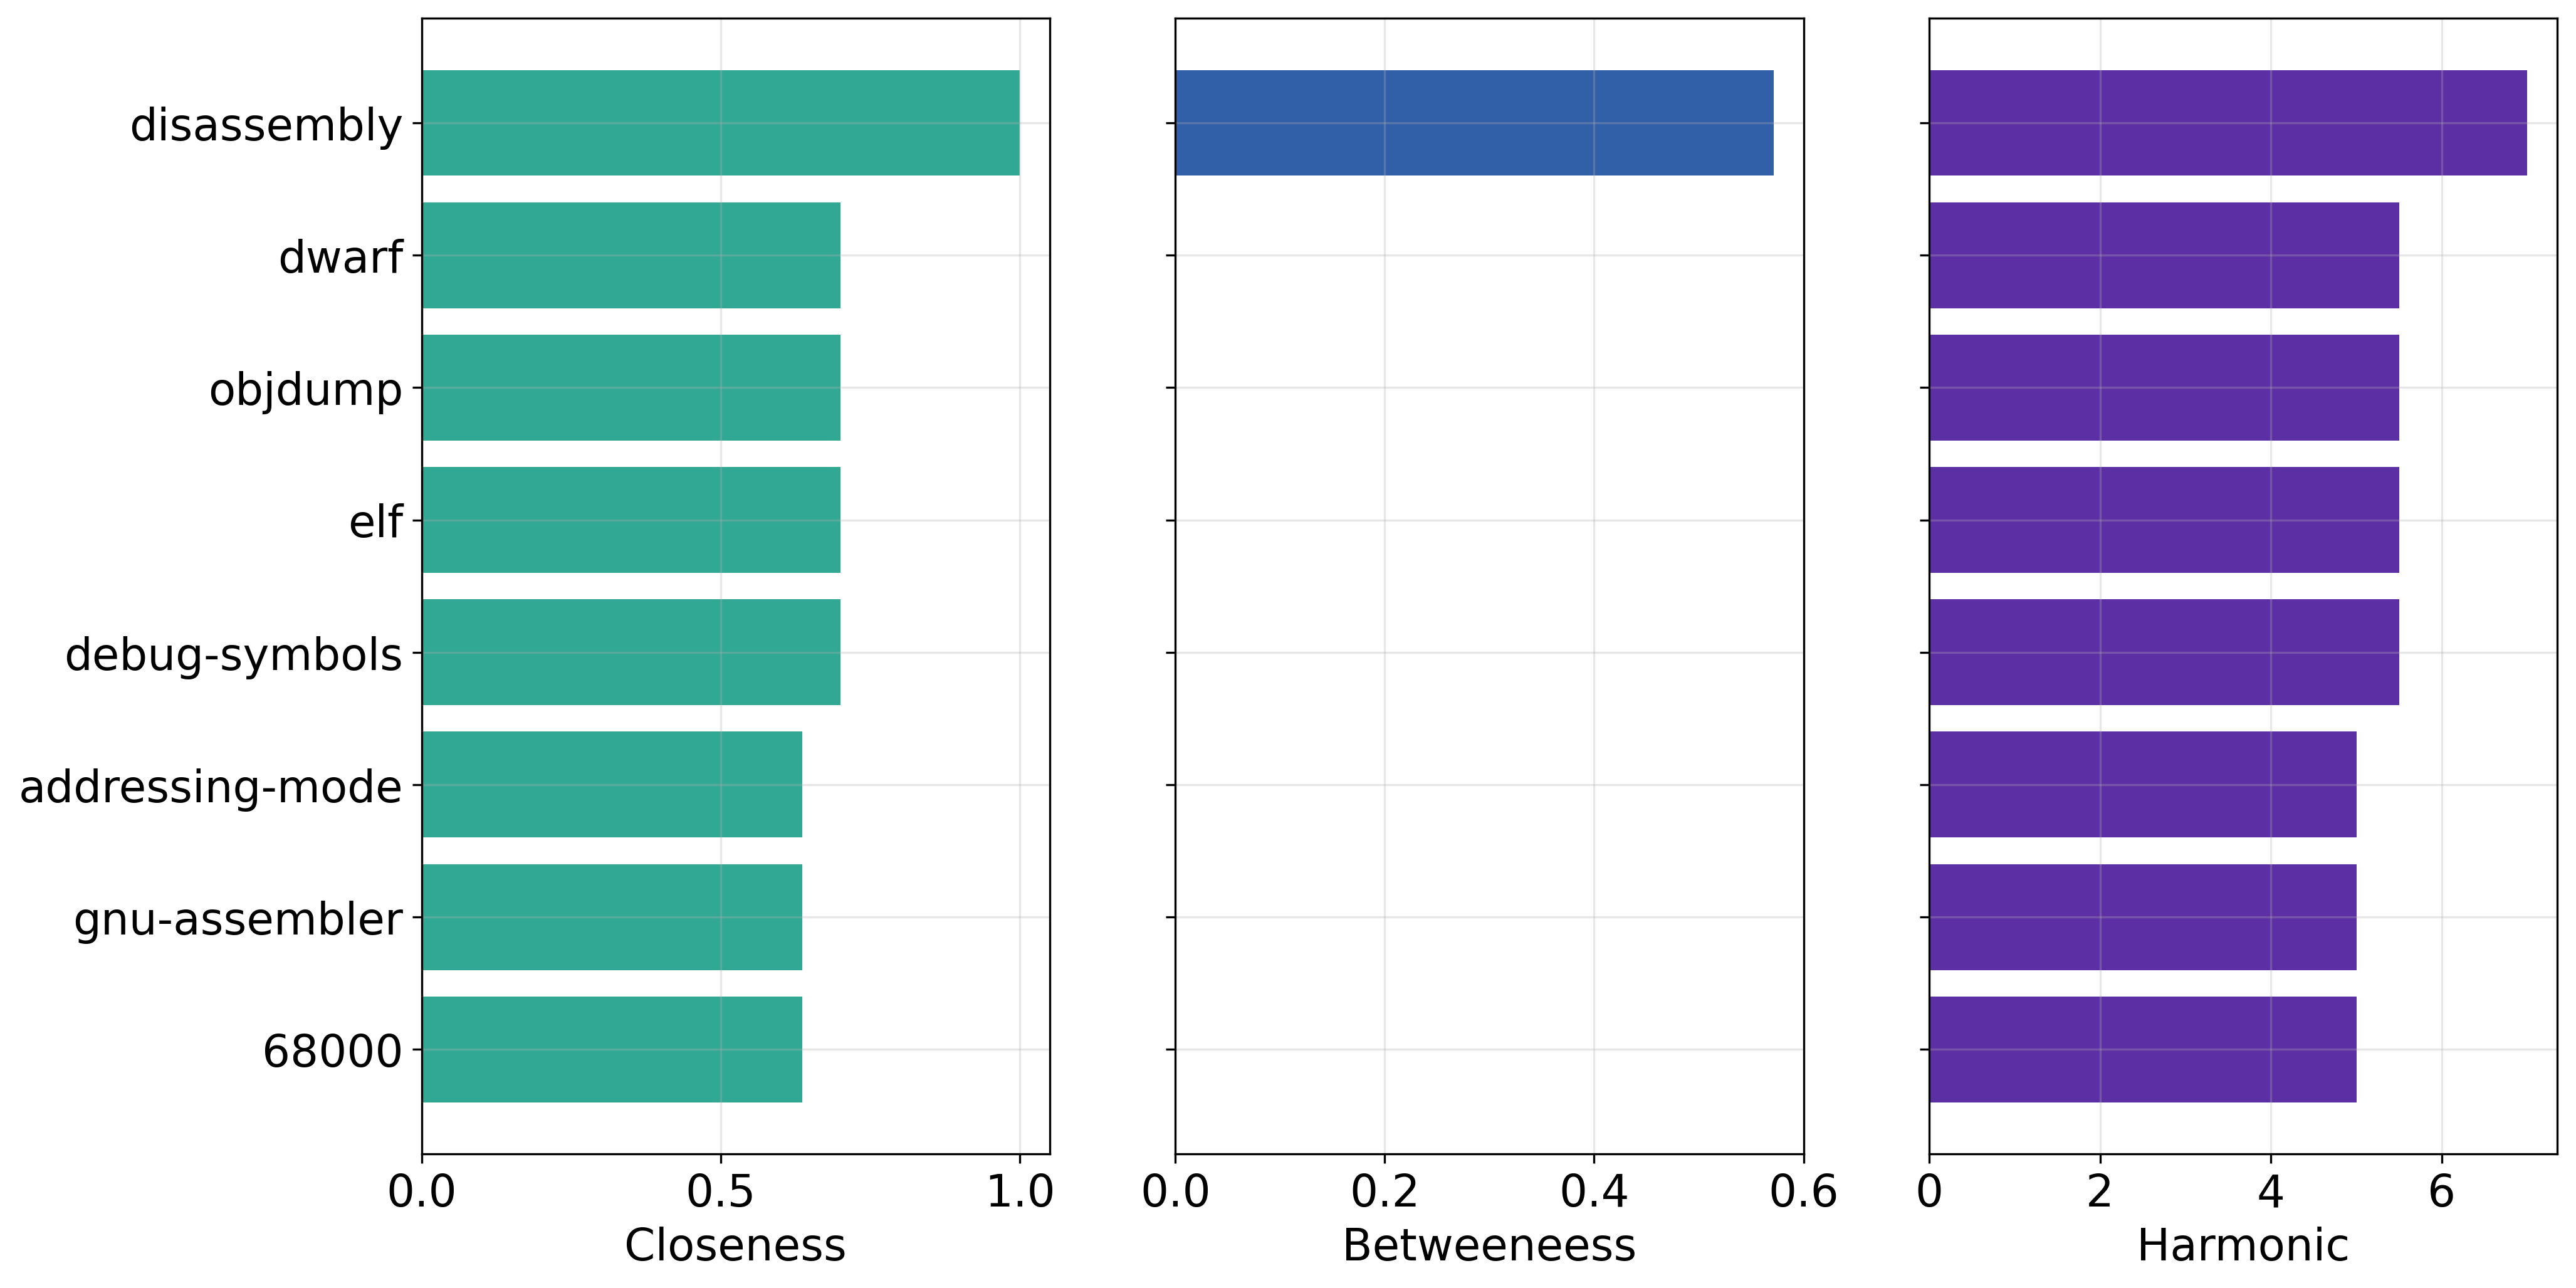

In [22]:
closeness_centrality = nx.closeness_centrality(sub_graphs[12])
harmonic_centrality = nx.harmonic_centrality(sub_graphs[12])
betweenness_centrality = nx.betweenness_centrality(sub_graphs[12], weight='Count')
plot_centralities(closeness_centrality, "Closeness", betweenness_centrality, "Betweeneess", harmonic_centrality, "Harmonic", 15)